## Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing
import statsmodels.api as sm
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import LSTM
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Data Load

In [2]:
# function to load corona virus deaths
def load_data():
    
    import pandas as pd
    url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
    # https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
    corona_data = pd.read_csv(url, sep=',') # use sep="," for coma separation. 
    corona_data.head()
    return(corona_data)

In [3]:
# gdp growth data
gdp_rate= pd.read_csv('GDP_growth_data/gdp_data.csv', skiprows=4)
# pandemic data
pandemic_data= pd.read_csv('pandemic.csv',encoding='ISO-8859-1')
# covid-19 data
corona_data= load_data()

In [4]:
# pre-processing
corona_data = corona_data.drop(['Province/State', 'Lat','Long'], axis=1)
global_deaths= pd.DataFrame(corona_data.sum(axis=0))
global_deaths.columns=['deaths']

## Predicting covid-19 deaths based on probability distribution

In [6]:
total_deaths_till_today= global_deaths.tail(1) # this is utomtically take latest data

## Assuming that we have death follows normal distribution curve.As peak is still not reached at we are at accelarating 
# pace to reach at peak, we can assume that we are at .3 cumalative probability distribution.
number_of_distributions= int(input('total values to be paased for cumalative probability distribution'))

list_prob= list()
list_deaths=list()
for i in range(number_of_distributions):
    
    cumalative_prob= float(input('present cumalative probability distribution option'))
    list_prob.append(cumalative_prob)
    deaths= int((total_deaths_till_today.values)/cumalative_prob)
    list_deaths.append(deaths) 
data_d=pd.DataFrame({'prob': list_prob, 'deaths': list_deaths})
print(data_d)    

total values to be paased for cumalative probability distribution3
present cumalative probability distribution option.1
present cumalative probability distribution option.2
present cumalative probability distribution option.3
   prob  deaths
0   0.1  587870
1   0.2  293935
2   0.3  195956


Text(0.5, 1.0, 'Expected number of deaths based on probability')

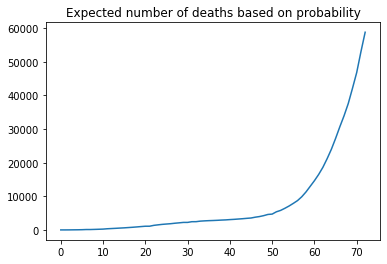

In [9]:
plot_dealts= global_deaths.values.ravel()
plot_dealts1= plot_dealts[1:len(plot_dealts)]
plot_dealts1=list(plot_dealts1)
p= np.arange(0,len(plot_dealts1))
# print(len(p), len(plot_dealts1))
sns.lineplot(p, plot_dealts1)
plt.title("Expected number of deaths based on probability")

In [13]:
fit3 = ExponentialSmoothing(plot_dealts1).fit()
fit2_mul = ExponentialSmoothing(plot_dealts1, seasonal_periods=None, trend='mul', seasonal=None).fit(use_boxcox=True)
fit2_add = ExponentialSmoothing(plot_dealts1, seasonal_periods=None, trend='add', seasonal=None).fit(use_boxcox=True)
# assuming it will take 15 days to reach peak
forecasts=(fit2_add.forecast(15))
print(forecasts)



[ 65480.87834098  72825.96609189  80888.32762795  89727.85972607
  99408.63489156 109999.13631817 121572.50298703 134206.7852122
 147985.21094603 162996.46316328 179334.96864809 197101.19851397
 216401.98079211 237350.82542953 260068.26204355]


In [16]:
ls_forecats= list(forecasts)
ls_forecats

[65480.87834098174,
 72825.96609189303,
 80888.32762795028,
 89727.85972607022,
 99408.63489155876,
 109999.13631817054,
 121572.50298703452,
 134206.78521219746,
 147985.21094603036,
 162996.463163279,
 179334.96864809404,
 197101.1985139657,
 216401.98079211355,
 237350.82542952965,
 260068.26204355463]

In [97]:
def plot_forecasted_death(n):
    
    plot_dealts1= list(plot_dealts[1:len(plot_dealts)])
    
    forecasts=(fit2_add.forecast(n))
    all_deaths= plot_dealts1
    for i in range(len(forecasts)):
        all_deaths.append(int(forecasts[i]))
        
    #plotting day wise all deaths
    l= np.arange(0,len(all_deaths))
    sns.lineplot(l, all_deaths)
    print('total deats expected', int(forecasts[len(forecasts)-1]))
    return(int(forecasts[len(forecasts)-1])*2, all_deaths)

total deats expected 99408


Text(0.5, 1.0, 'Expected number of deaths based on ETS')

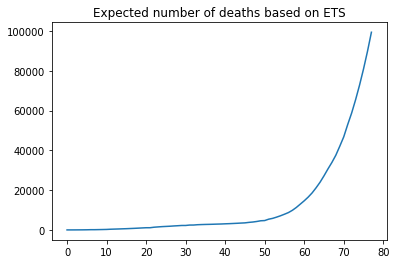

In [102]:
tot_deaths, daily_deaths = plot_forecasted_death(5)
plt.title("Expected number of deaths based on ETS")

In [103]:
ls_d= list(daily_deaths)
d=list()

complete_list=ls_d

In [104]:
def add_rev (x): 

    
    newlist=x
    length= len(x)
    for i in range(length):
        val= x[length-i-1]
        val+= newlist[-1]
        newlist.append(val)
        print(val)
    return(newlist)
    
list1=[1,2,3,4,5] 
all_list= (add_rev(ls_d))



198816
288543
369431
442256
507736
566523
619506
666315
708422
746004
779929
810581
837779
861749
882930
901555
918060
932711
945684
956983
966850
975583
983488
990614
997054
1002873
1008277
1012997
1017612
1021874
1025862
1029664
1033222
1036682
1040030
1043284
1046444
1049529
1052525
1055466
1058338
1061152
1063922
1066630
1069259
1071728
1074186
1076437
1078684
1080806
1082813
1084681
1086451
1088117
1089640
1091011
1092129
1093242
1094255
1095161
1095967
1096686
1097320
1097884
1098376
1098802
1099164
1099423
1099636
1099807
1099940
1100071
1100153
1100209
1100251
1100277
1100295
1100312


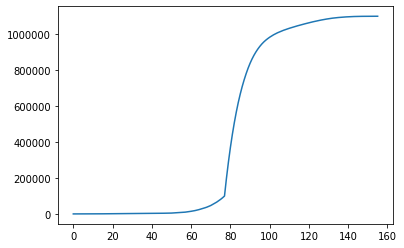

In [105]:
sns.lineplot(np.arange(len(all_list)), all_list)

## Taking GDP data yearly

In [ ]:
world_gdp_rate= gdp_rate.loc[gdp_rate['Country Name'] == 'World'] 
world_gdp_rate.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True) 
gdp= world_gdp_rate.T 
gdp.fillna(0)
gdp_values= gdp.values
gdp_years= gdp.index

In [ ]:
# subsetting pandemic data after 1960 
# creating dic of deaths from pandemic table
pandemic_data1= pandemic_data.iloc[13:]
pandemic_data2=pandemic_data1.drop(columns=['Type / Pre-human host', 'Name'])
dict_death= {'1968':300000, '1967':300000,'1970':300000, '2009':100000,'2010':100000, '2002':770,'2014':5500,'2015':5500, '2020':tot_deaths}

In [ ]:
## pre processing GDP data

gdp['deaths']=0
gdp['year']=gdp.index
gdp.rename(columns={257: 'GDP_growth'}, inplace=True) # rename column
row=pd.DataFrame({'GDP_growth' :[0], 'deaths':[0], 'year':['2020']})
gdp=gdp.append(row)
gdp['deaths'] = gdp['year'].map(dict_death)
gdp.fillna(0, inplace=True)
gdp= gdp[gdp.year != 'Unnamed: 64']
gdp.at['2019','GDP_growth']= 2.6

## Plot deaths and GPD rate

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(30)
t = gdp.year
s1 =gdp.GDP_growth
s2 = gdp.deaths

ax1 = plt.subplot(211)
plt.plot(t, s1)
plt.title("GDP_growth")
plt.setp(ax1.get_xticklabels(), fontsize=10)

ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, s2)
plt.title("Deaths")
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=True)

# share x and y
# plt.xlim(0.01, 10.0)
plt.show()

## Forecasting GDP using ARIMA(keeping deaths as external variable)

In [ ]:
model = sm.tsa.statespace.SARIMAX(gdp.GDP_growth, trend='c', order=(1,0,1),exog=gdp.deaths)

model_fit = model.fit()

# predicted = model_fit.forecast(step=1,exog=[[Y_exog_test]], dynamic=True)
predicted = model_fit.forecast(step=1, exog=gdp.deaths[len(gdp)-1: len(gdp)] , dynamic=True)

## Fitting LSTM with external variables

### Pre-processing LSTM model

In [ ]:
## adding share price data
lstm_stock_data=gdp
# stocks= pd.read_csv('yearly_stock.csv' )
# stocks.rename(columns={'Unnamed: 0':'year'}, inplace=True)

# stocks.columns
# stocks['year']=stocks['Date'].astype(str)
# stocks = stocks.drop("Date", axis=1)
# lstm_stock_data=pd.merge(lstm_data,stocks, on='year')

In [ ]:
# adding recession and number of countries affected by epidemic

dict_recession= {'1970':1, '1974':1,'1975':1, '1980':1,'1981':1, '1982':1,'1983':1,'1990':1, '1991':1, '1992':1, '1993':1,'1998':1,
            '2001':1, '2002':1, '2008':1, '2009':1}

dict_noof_country= {'2003':31, '2004':31,'2009':178, '2010':178,'2014':10, '2015':10,'2016':37,'2017':27, '2020':177}

lstm_stock_data['recession_flag']= lstm_stock_data['year'].map(dict_recession)
lstm_stock_data['no_of_countries']= lstm_stock_data['year'].map(dict_noof_country)

In [ ]:
lstm_stock_data

In [19]:
## creating lagged variable
lstm_stock_data["gdp_lagged1"]= lstm_stock_data["GDP_growth"].shift(1)
lstm_stock_data["gdp_lagged2"]= lstm_stock_data["GDP_growth"].shift(2)
lstm_stock_data.fillna(0, inplace=True)
lstm_stock_data[["deaths", "no_of_countries"]] = keras.utils.normalize(lstm_stock_data[["deaths", "no_of_countries"]], axis = 1 )

In [20]:
len(lstm_stock_data)

61

In [21]:
# creating test ands train dataset
test_df= lstm_stock_data.iloc[2:len(lstm_stock_data),]
test_df_X= test_df[['deaths', 'recession_flag','no_of_countries','gdp_lagged1','gdp_lagged2']]
test_df_y= test_df[['GDP_growth']]

train_df= lstm_stock_data.iloc[0:len(lstm_stock_data)-2,]
train_df_X= train_df[['deaths', 'recession_flag','no_of_countries','gdp_lagged2','gdp_lagged2']]
train_df_Y=train_df[['GDP_growth']]

In [22]:
np_train_X= np.reshape(np.array(train_df_X),(59,1,5))
np_train_Y=np.array(train_df_Y)

np_test_X= np.array(test_df_X)
np_test_X=np.reshape(np_test_X, (59,1,5))

### Building and fitting LSTM model

In [23]:
## building LSTM model on share price
model = Sequential()
model.add(LSTM(10, input_shape=(np_train_X.shape[1], np_train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [ ]:
# fitting the model
history = model.fit(np_train_X, np_train_Y, epochs=10, batch_size = 3, 
                    validation_data=(np_train_X, np_train_Y), verbose=2, shuffle=False)

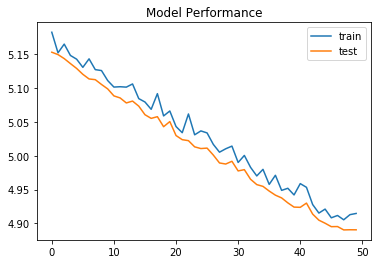

In [857]:
# plotting test and train 
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.title('Model Performance')
pyplot.show()

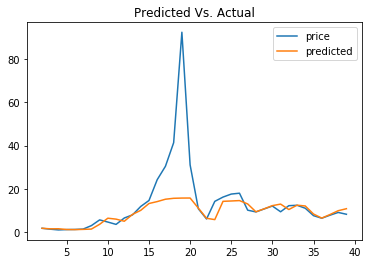

In [858]:
yhat = model.predict(np_test_X)
test_df_y["predicted"] = yhat
test_df_y.plot(title="Predicted Vs. Actual")

### LSTM only on stock data

In [859]:
## adding share price data
only_stock=stocks
only_stock['lagged_price1']= only_stock['price'].shift(1)
only_stock['lagged_price2']= only_stock['price'].shift(2)
only_stock.fillna(0, inplace=True)
test_df_1 = only_stock.iloc[2:len(only_stock),]
test_df_X_1 = test_df_1[['lagged_price1','lagged_price2']]
test_df_y_1 = test_df_1[['price']]

train_df_1 = only_stock.iloc[0:len(only_stock)-2,]
train_df_X_1= train_df_1[['lagged_price1','lagged_price2']]
train_df_Y_1=train_df_1[['price']]

In [860]:
np_train_X_1= np.reshape(np.array(train_df_X_1),(38,1,2) )
np_train_Y_1= np.array(train_df_Y_1)
np_test_X_1= np.array(test_df_X_1)
np_test_X_1=np.reshape(np_test_X_1, (38,1,2))

In [864]:
model_1 = Sequential()
model_1.add(LSTM(10, input_shape=(np_train_X_1.shape[1], np_train_X_1.shape[2])))
model_1.add(Dense(1))
model_1.compile(loss='mae', optimizer='adam')
history_1 = model_1.fit(np_train_X_1, np_train_Y_1, epochs=50, batch_size = 3, validation_data=(np_train_X_1, np_train_Y_1), verbose=2, shuffle=False)

Train on 38 samples, validate on 38 samples
Epoch 1/50
 - 2s - loss: 12.7621 - val_loss: 12.7320
Epoch 2/50
 - 0s - loss: 12.7076 - val_loss: 12.6789
Epoch 3/50
 - 0s - loss: 12.6543 - val_loss: 12.6253
Epoch 4/50
 - 0s - loss: 12.5992 - val_loss: 12.5686
Epoch 5/50
 - 0s - loss: 12.5391 - val_loss: 12.5048
Epoch 6/50
 - 0s - loss: 12.4679 - val_loss: 12.4247
Epoch 7/50
 - 0s - loss: 12.3733 - val_loss: 12.3166
Epoch 8/50
 - 0s - loss: 12.2460 - val_loss: 12.1678
Epoch 9/50
 - 0s - loss: 12.0709 - val_loss: 11.9984
Epoch 10/50
 - 0s - loss: 11.9308 - val_loss: 11.8715
Epoch 11/50
 - 0s - loss: 11.8060 - val_loss: 11.7431
Epoch 12/50
 - 0s - loss: 11.6707 - val_loss: 11.6048
Epoch 13/50
 - 0s - loss: 11.5335 - val_loss: 11.4671
Epoch 14/50
 - 0s - loss: 11.3932 - val_loss: 11.3202
Epoch 15/50
 - 0s - loss: 11.2438 - val_loss: 11.1685
Epoch 16/50
 - 0s - loss: 11.0935 - val_loss: 11.0175
Epoch 17/50
 - 0s - loss: 10.9463 - val_loss: 10.8815
Epoch 18/50
 - 0s - loss: 10.8212 - val_loss: 1

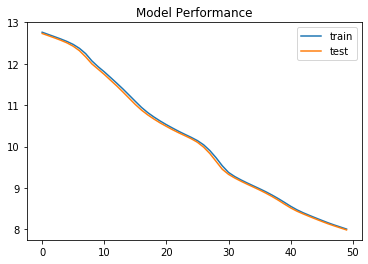

In [865]:
pyplot.plot(history_1.history['loss'], label='train')
pyplot.plot(history_1.history['val_loss'], label='test')
pyplot.legend()
pyplot.title('Model Performance')
pyplot.show()

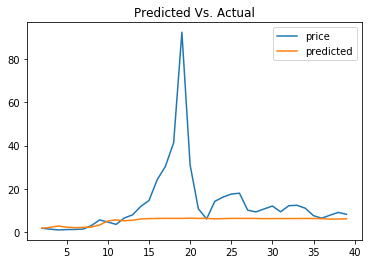

In [866]:
model_1
yhat_1 = model_1.predict(np_test_X_1)
test_df_y_1["predicted"] = yhat_1
test_df_y_1.plot(title="Predicted Vs. Actual")